In [16]:

import pandas as pd
import seaborn as sn
from sklearn.linear_model import LogisticRegression

In [17]:
df = pd.read_csv("C:\\Users\\PRATIK\\Downloads\\bank-full.csv",sep=',')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
df.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [21]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
df_sel = df[columns]
df_sel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [22]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [23]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [24]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [25]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [30]:
# The most important column here is y, which is the output variable (desired target): this will tell us if the client subscribed to a term deposit(binary: ‘yes’,’no’).

import matplotlib.pyplot as plt

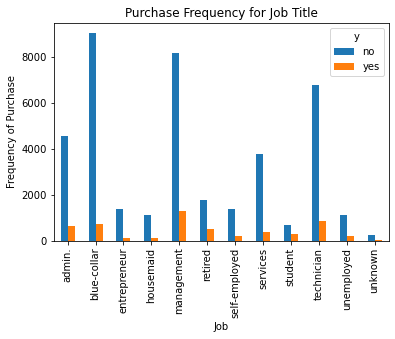

In [31]:
# # Visualizations
get_ipython().run_line_magic('matplotlib', 'inline')
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [ ]:
# The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

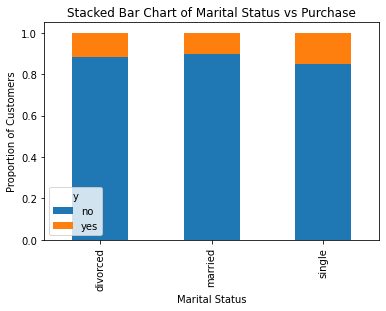

In [32]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [ ]:

# The marital status does not seem a strong predictor for the outcome variable.

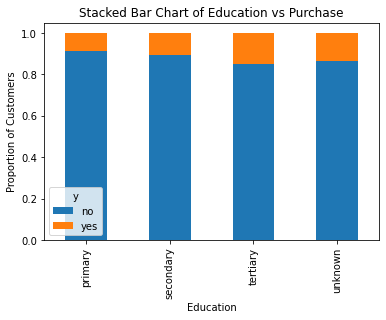

In [33]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [ ]:
# Education seems a good predictor of the outcome variable.

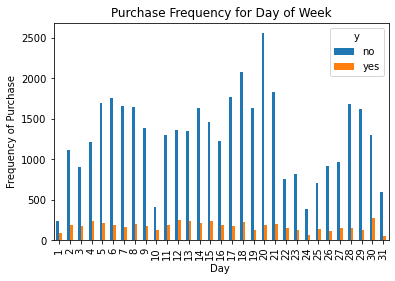

In [34]:
pd.crosstab(df.day,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day ')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [ ]:

# Day  may not be a good predictor of the outcome

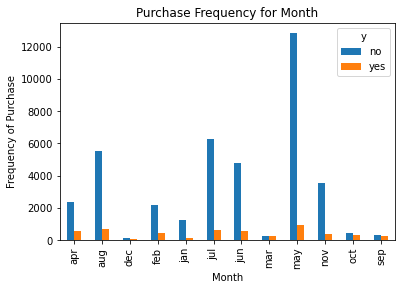

In [35]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')


In [ ]:
# Month might be a good predictor of the outcome variable.

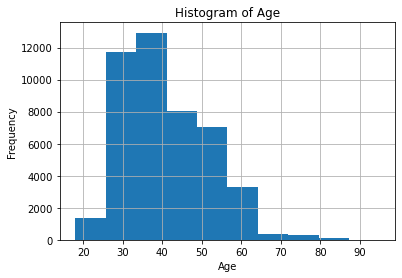

In [41]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [ ]:
# Most of the customers of the bank in this dataset are in the age range of 30–40.

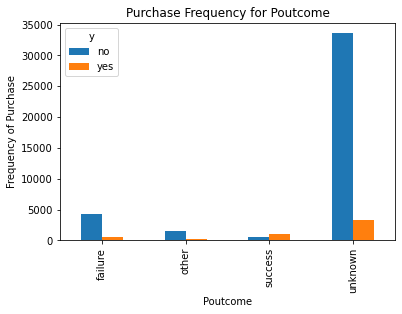

In [42]:

pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


In [ ]:
# Poutcome seems to be a good predictor of the outcome variable.

In [ ]:

# define a function in order to calculate the prevalence of population that subscribes to a term deposit.

<AxesSubplot:xlabel='age'>

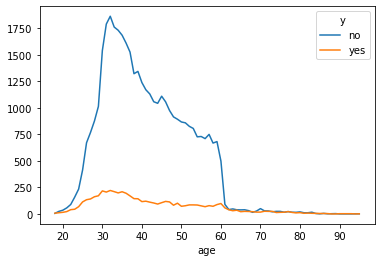

In [43]:

pd.crosstab(df_sel.age,df_sel.y).plot(kind="line")

<AxesSubplot:>

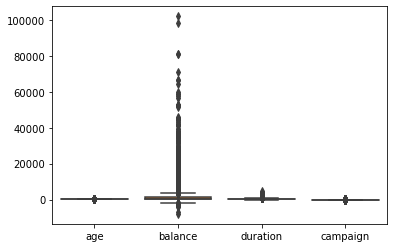

In [45]:
sn.boxplot(data =df_sel,orient = "v")

In [46]:
df_sel['outcome'] = df_sel.y.map({'no':0, 'yes':1})
df_sel.tail(10)

<ipython-input-46-a3013d3dc326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['outcome'] = df_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

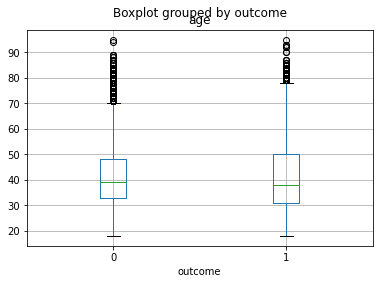

In [47]:
df_sel.boxplot(column='age', by='outcome')

In [48]:

# #probably not a great feature since lot of outliers

In [49]:

feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = df_sel[feature_col]
Y = df_sel[output_target]

In [50]:
classifier = LogisticRegression()

In [51]:
classifier.fit(X,Y)

C:\Users\PRATIK\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [52]:

classifier.coef_ # coefficients of features 

array([[ 7.69721803e-03,  3.72191058e-05,  3.54908906e-03,
        -1.39828316e-01]])

In [53]:
classifier.predict_proba (X) # Probability values

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553761, 0.69446239],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [54]:
y_pred = classifier.predict(X)

In [55]:

y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:

confusion_matrix = confusion_matrix(Y,y_pred)


In [58]:

print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


Text(0.5, 15.0, 'Predicted Label')

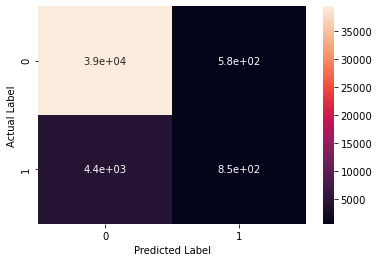

In [59]:
sn.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
# # ROC curve on the dataset

In [61]:

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [62]:

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

In [64]:

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\PRATIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9521276595744681


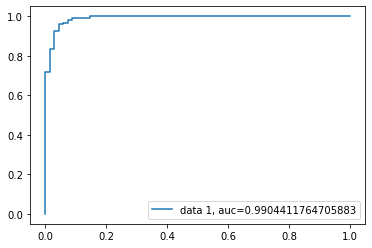

In [66]:

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [67]:

pip install plot-metric 

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install metriculous


  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42903 sha256=94bb4c90d93ca6d0a5edd4bc99b5f8bf24ebd715327b04da33246648776b3700
  Stored in directory: c:\users\pratik\appdata\local\pip\cache\wheels\57\86\c9\1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy


In [87]:

#define the predictor variables and the response variable
X = df[['age', 'balance', 'campaign']]
y = df['default']


In [88]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [89]:

#instantiate the model
log_regression = LogisticRegression()

In [90]:
#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [92]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)
model = clf.fit(X_train, y_train)

In [93]:
# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]

In [94]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

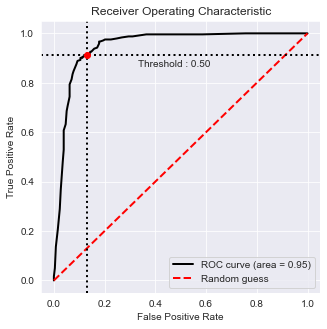

In [95]:
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()


In [96]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [97]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [98]:
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [99]:

import numpy as np
from sklearn import metrics

In [100]:

y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75